In [2]:
!pip3 install torch torchvision torchaudio

In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!pip install -r yolov5/requirements.txt

In [30]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/simon/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-7-21 torch 1.9.0 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 
/Users/simon/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459044803/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [7]:
import uuid   # Unique identifier
import os
import time

In [8]:
IMAGES_PATH = os.path.join('yolov5', 'data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [5]:
cap = cv2.VideoCapture(1)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [6]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

yolov5/data/images/awake.d4d318c8-ea80-11eb-b943-acde48001122.jpg


In [7]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

yolov5/data/images/awake.d4d3eb72-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/awake.d4d3f194-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/awake.d4d3f3ec-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/awake.d4d3f69e-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/awake.d4d3f7e8-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/awake.d4d3f8f6-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/awake.d4d3fa7c-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/awake.d4d3fbee-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/awake.d4d3fd56-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/awake.d4d3febe-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/drowsy.d4d400d0-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/drowsy.d4d40242-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/drowsy.d4d403aa-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/drowsy.d4d40512-ea80-11eb-b943-acde48001122.jpg
yolov5/data/images/drowsy.d4d4067a-ea80-11eb-b943-acde48001122.jpg
yolov

In [9]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [10]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrcj

In [35]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: ⚠️ WARNING: code is out of date by 2 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 v5.0-303-g3bef77f torch 1.9.0 CPU

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

     8/499        0G    0.1057    0.0193   0.07124    0.1963         8       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20   0.000553       0.05   6.04e-05   6.04e-06

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     9/499        0G    0.1041   0.02687   0.07241    0.2034        16       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20          0          0          0          0          0

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    10/499        0G    0.1064   0.01993   0.07147    0.1978         7       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20   0.000717        0.1   0.000147   1.47e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    11/


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    33/499        0G   0.08281   0.02682   0.05719    0.1668         7       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20    0.00118        0.2   0.000581   5.81e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    34/499        0G   0.08008   0.02685   0.05596    0.1629         9       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20    0.00175        0.2   0.000532   7.24e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    35/499        0G   0.07684    0.0263   0.05293    0.1561         7       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20    0.00174        0.2    0.00068   9.16e-05

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    58/499        0G   0.05633   0.01971   0.03831    0.1143         5       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.423        0.3      0.377     0.0705

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    59/499        0G   0.06153   0.03357    0.0394    0.1345        15       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.341      0.429      0.437     0.0757

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    60/499        0G   0.05818   0.02934   0.03844     0.126        11       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.289      0.344      0.361     0.0661

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    83/499        0G   0.05435   0.02211   0.03302    0.1095        12       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.529      0.646      0.601      0.221

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    84/499        0G   0.05475   0.02548   0.03498    0.1152        12       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.493       0.75      0.551      0.255

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    85/499        0G   0.05245    0.0203   0.03391    0.1067        10       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20       0.51      0.676      0.563      0.148

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   108/499        0G   0.05261   0.01441    0.0317   0.09872         6       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.642       0.88      0.746      0.357

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   109/499        0G   0.05702   0.01758   0.03251    0.1071        11       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.375      0.594      0.521      0.119

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   110/499        0G   0.05742   0.01658   0.03338    0.1074         9       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.601      0.822      0.725      0.296

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   133/499        0G   0.05388   0.02018   0.03036    0.1044        14       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.661      0.988      0.739      0.304

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   134/499        0G   0.05094   0.01409   0.02846   0.09349         7       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.553      0.794      0.665      0.222

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   135/499        0G   0.05006   0.01653   0.02935   0.09594         9       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.722       0.95      0.773      0.409

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   158/499        0G   0.04576   0.01384   0.02173   0.08134         6       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.907      0.986      0.981      0.481

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   159/499        0G   0.04919   0.01874   0.02238   0.09032        11       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.778      0.898      0.903      0.444

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   160/499        0G   0.05249    0.0165   0.02143   0.09042        11       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.987      0.949      0.991      0.455

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   183/499        0G   0.04927   0.01643   0.01538   0.08108        10       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.973        0.9      0.976      0.313

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   184/499        0G   0.04743   0.01458   0.01425   0.07626        10       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20       0.95          1      0.991      0.541

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   185/499        0G   0.04205   0.02031   0.01337   0.07572        14       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.976      0.899      0.982      0.655

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   208/499        0G   0.04913   0.01521   0.01085   0.07519        12       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20          1      0.988      0.995      0.536

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   209/499        0G   0.05009   0.01183   0.01828    0.0802         6       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.872          1      0.984      0.532

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   210/499        0G   0.04713   0.01361   0.01144   0.07218         9       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.781       0.75      0.812      0.383

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   233/499        0G   0.04502   0.01525   0.00897   0.06924        11       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.932       0.95      0.981      0.524

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   234/499        0G   0.05001   0.01293  0.009868   0.07281        10       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.971      0.994      0.995      0.454

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   235/499        0G   0.04596   0.01382   0.01079   0.07057         9       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.938          1      0.991      0.649

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   258/499        0G   0.04656  0.009375  0.006139   0.06207         7       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.959      0.849      0.963      0.564

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   259/499        0G    0.0424   0.01108  0.007732   0.06121         6       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.875      0.843      0.951      0.482

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   260/499        0G    0.0409   0.01111  0.007322   0.05933         8       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.889          1      0.967      0.575

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   283/499        0G   0.04429   0.01251  0.005918   0.06272         8       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.999          1      0.995      0.645

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   284/499        0G   0.04103   0.01265  0.006187   0.05987         7       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.951          1      0.991      0.538

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   285/499        0G   0.04351   0.01222  0.006253   0.06198        10       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.951          1      0.991      0.538

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   308/499        0G   0.04001  0.009691  0.006021   0.05572         6       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.997          1      0.995      0.683

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   309/499        0G    0.0407   0.01314  0.007573   0.06142        10       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.997          1      0.995      0.683

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   310/499        0G   0.03755   0.01182  0.008383   0.05776         8       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.996          1      0.995      0.568

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   333/499        0G   0.04273   0.01279  0.007541   0.06306        12       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.952      0.999      0.986      0.614

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   334/499        0G   0.03711   0.01124  0.008251    0.0566         7       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.999          1      0.995      0.711

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   335/499        0G   0.03455   0.01456  0.006304   0.05541        13       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20          1          1      0.995      0.499

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   358/499        0G    0.0396   0.01308   0.00653    0.0592        11       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.991          1      0.995      0.716

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   359/499        0G   0.03145   0.01093    0.0052   0.04758         8       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.991          1      0.995      0.576

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   360/499        0G   0.04149   0.01007  0.005279   0.05684         7       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.991          1      0.995      0.576

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   383/499        0G   0.02907   0.01311  0.004869   0.04705        12       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.998          1      0.995      0.697

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   384/499        0G    0.0372   0.01394  0.005741   0.05688        12       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.998          1      0.995      0.697

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   385/499        0G   0.03445   0.01039  0.009515   0.05436         8       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.999          1      0.995      0.713

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   408/499        0G   0.03763   0.01131  0.006312   0.05525         9       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.993          1      0.995      0.716

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   409/499        0G   0.03361   0.01122  0.004235   0.04907         8       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.995          1      0.995      0.733

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   410/499        0G   0.03191    0.0152  0.006775   0.05388        16       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.952          1      0.995       0.67

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   433/499        0G   0.02976   0.01049  0.006288   0.04654         5       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.995          1      0.995       0.75

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   434/499        0G   0.03533   0.01182  0.004538   0.05169         9       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.995          1      0.995      0.708

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   435/499        0G   0.03332   0.01254  0.006139     0.052        13       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.995          1      0.995      0.708

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   458/499        0G   0.03473  0.009903  0.003769    0.0484         7       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.998          1      0.995      0.729

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   459/499        0G   0.03218  0.009887  0.004792   0.04685        10       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.998          1      0.995      0.729

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   460/499        0G   0.03019   0.01196  0.004255   0.04641        10       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20          1          1      0.995      0.666

     E


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   483/499        0G   0.03105    0.0101  0.005809   0.04696         9       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.994          1      0.995      0.658

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   484/499        0G    0.0265  0.008006  0.003609   0.03812         4       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.951          1      0.995      0.762

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   485/499        0G   0.03635   0.01229  0.007357     0.056        11       320
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20         20      0.951          1      0.995      0.762

     E

In [36]:
import torch
import os

In [37]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/simon/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-7-22 torch 1.9.0 CPU

Fusing layers... 
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [41]:
imgAwake = os.path.join('/Users/simon/Desktop/Projects/sleepyAI/yolov5/data/images/awake.c1b3bbb2-ea80-11eb-b943-acde48001122.jpg')
imgDrowsy = os.path.join('/Users/simon/Desktop/Projects/sleepyAI/yolov5/data/images/drowsy.d375c4c6-ea80-11eb-b943-acde48001122.jpg')
resultsAwake = model(imgAwake)
resultsAwake.print()
resultsDrowsy = model(imgDrowsy)
resultsDrowsy.print()

image 1/1: 720x1280 1 awake
Speed: 19.7ms pre-process, 170.4ms inference, 0.6ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 720x1280 1 drowsy
Speed: 17.0ms pre-process, 161.6ms inference, 0.6ms NMS per image at shape (1, 3, 384, 640)


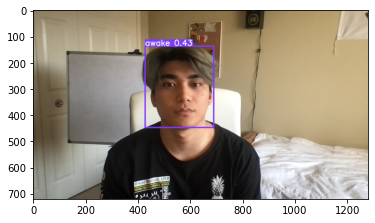

In [42]:
%matplotlib inline 
plt.imshow(np.squeeze(resultsAwake.render()))
plt.show()

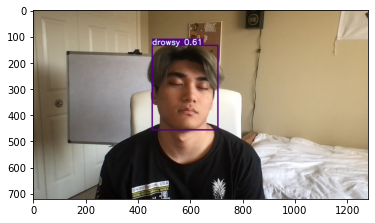

In [43]:
%matplotlib inline 
plt.imshow(np.squeeze(resultsDrowsy.render()))
plt.show()

In [40]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('sleepyAI', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()